# 1. Install Dependencies and Setup

In [565]:
pip install opencv-python-headless opencv-python matplotlib scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [566]:
pip list

Package                      Version
---------------------------- ------------
absl-py                      2.0.0
anyio                        4.2.0
argon2-cffi                  23.1.0
argon2-cffi-bindings         21.2.0
arrow                        1.3.0
asttokens                    2.4.1
astunparse                   1.6.3
async-lru                    2.0.4
attrs                        23.2.0
Babel                        2.14.0
backcall                     0.2.0
beautifulsoup4               4.12.2
bleach                       6.1.0
cachetools                   5.3.2
certifi                      2023.11.17
cffi                         1.16.0
charset-normalizer           3.3.2
colorama                     0.4.6
comm                         0.1.4
contourpy                    1.2.0
cycler                       0.12.1
debugpy                      1.6.7
decorator                    5.1.1
defusedxml                   0.7.1
exceptiongroup               1.2.0
executing                    2.0.1

In [567]:
# only for those who are using NVIDIA GPU
#import tensorflow as tf; print(tf.config.list_physical_devices('GPU'))

In [568]:
import tensorflow as tf;
import keras.api._v2.keras as keras
import os

# 2. Remove Dodgy Images

In [569]:
import cv2
import imghdr

In [570]:
# name of the folder containing training datasets
data_dir = 'data'

In [571]:
image_exts = ['jpeg','jpg','bmp','png']

In [572]:
for image_class in os.listdir(data_dir): # image_class: cat, rabbit (folder)
    for image in os.listdir(os.path.join(data_dir,image_class)): # /data/cat/ (filepath)
        image_path = os.path.join(data_dir,image_class,image) # /data/cat/img1.jpg (filepath)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print("Image not in the ext list {}".format(image_path))
                os.remove(image_path)
        except Exception as e:
            print("Issue with image {}".format(image_path))

# Step 3. Load Data

In [573]:
import numpy as np
from matplotlib import pyplot as plt

In [574]:
# Load image dataset using Keras
data = keras.utils.image_dataset_from_directory(data_dir)

Found 1600 files belonging to 2 classes.


In [575]:
# Load the image dataset inside the pet food feeder aka iterator
# pour the pet foods into the pet food feeder
data_iterator = data.as_numpy_iterator()

In [576]:
# batch is the food comes out from the pet food feeder,
# after we press the release food button of the feeder aka next()
batch = data_iterator.next()

In [577]:
print(batch) # ([array of img], [array of labels/target])

(array([[[[2.38000000e+02, 2.47000000e+02, 2.46000000e+02],
         [2.38257812e+02, 2.47257812e+02, 2.46257812e+02],
         [2.39429688e+02, 2.48429688e+02, 2.47429688e+02],
         ...,
         [2.38380676e+02, 2.47380676e+02, 2.46380676e+02],
         [2.37235657e+02, 2.45493469e+02, 2.46720032e+02],
         [2.37000000e+02, 2.45000000e+02, 2.47000000e+02]],

        [[2.38257812e+02, 2.47257812e+02, 2.46257812e+02],
         [2.38515625e+02, 2.47515625e+02, 2.46515625e+02],
         [2.39687500e+02, 2.48687500e+02, 2.47687500e+02],
         ...,
         [2.37859375e+02, 2.46859375e+02, 2.45859375e+02],
         [2.37000000e+02, 2.45257812e+02, 2.46484375e+02],
         [2.37000000e+02, 2.45000000e+02, 2.47000000e+02]],

        [[2.39000000e+02, 2.48000000e+02, 2.47000000e+02],
         [2.39257812e+02, 2.48257812e+02, 2.47257812e+02],
         [2.40429688e+02, 2.49429688e+02, 2.48429688e+02],
         ...,
         [2.38104431e+02, 2.47104431e+02, 2.46104431e+02],
         

In [578]:
print(len(batch[1])) # each "batch" has 32 images

32


In [579]:
print(batch[0].shape) # 32 images, each image height:256,width:256,channel:3 (rgb)

(32, 256, 256, 3)


In [580]:
print(batch[0][:4].shape) # want the first 4 images

(4, 256, 256, 3)


In [581]:
print(batch[0][0].shape) # get the shape of data for 1st image
# 256 - width pixels
# 256 - height pixels
# 3 - rgb 

(256, 256, 3)


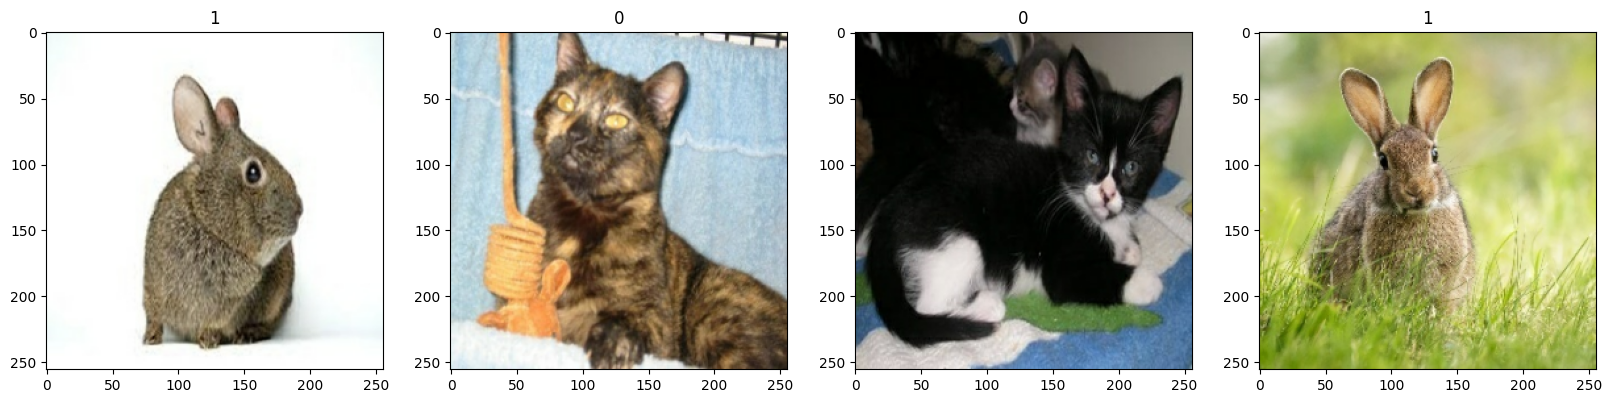

In [582]:
fig,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale the Data

In [583]:
print(batch[0][0]) # print data in the form of array for 1st image
# lowest is 0, highest is 255

[[[238.      247.      246.     ]
  [238.25781 247.25781 246.25781]
  [239.42969 248.42969 247.42969]
  ...
  [238.38068 247.38068 246.38068]
  [237.23566 245.49347 246.72003]
  [237.      245.      247.     ]]

 [[238.25781 247.25781 246.25781]
  [238.51562 247.51562 246.51562]
  [239.6875  248.6875  247.6875 ]
  ...
  [237.85938 246.85938 245.85938]
  [237.      245.25781 246.48438]
  [237.      245.      247.     ]]

 [[239.      248.      247.     ]
  [239.25781 248.25781 247.25781]
  [240.42969 249.42969 248.42969]
  ...
  [238.10443 247.10443 246.10443]
  [237.11078 245.36859 246.59515]
  [237.      245.      247.     ]]

 ...

 [[255.      255.      255.     ]
  [255.      255.      255.     ]
  [255.      255.      255.     ]
  ...
  [255.      255.      255.     ]
  [255.      255.      255.     ]
  [255.      255.      255.     ]]

 [[255.      255.      255.     ]
  [255.      255.      255.     ]
  [255.      255.      255.     ]
  ...
  [255.      255.      255.     ]
  [2

In [584]:
print(batch[0][0].shape)

(256, 256, 3)


In [585]:
data = data.map(lambda x,y: (x/255,y))
# (x,y): ([array of data of images], [array of targets]) 
# lowest is still 0, highest is 1

In [586]:
# check if scaling is successful
# if successful, should get 0 - 1
data.as_numpy_iterator().next()

(array([[[[0.4411798 , 0.4568661 , 0.4686308 ],
          [0.43570748, 0.45139375, 0.46315846],
          [0.43498224, 0.4506685 , 0.46243322],
          ...,
          [0.37681574, 0.32975692, 0.3689726 ],
          [0.40725192, 0.3601931 , 0.40522987],
          [0.37038597, 0.32332715, 0.37038597]],
 
         [[0.46767768, 0.484375  , 0.49715075],
          [0.4528799 , 0.46931654, 0.48183164],
          [0.43911827, 0.45480454, 0.46656924],
          ...,
          [0.34736592, 0.3003071 , 0.33952278],
          [0.34644082, 0.299382  , 0.34441876],
          [0.2838884 , 0.23682956, 0.2838884 ]],
 
         [[0.46858844, 0.48819628, 0.5038825 ],
          [0.45663416, 0.47523096, 0.48990622],
          [0.44682187, 0.46250814, 0.47427285],
          ...,
          [0.29088205, 0.24382325, 0.2830389 ],
          [0.31694406, 0.26988524, 0.314922  ],
          [0.3063613 , 0.25930247, 0.3063613 ]],
 
         ...,
 
         [[0.4140486 , 0.45718586, 0.53561723],
          [0.43983

# 5. Split Data

In [587]:
train_size = int(len(data) * 0.7)
val_size = int(len(data) * 0.2) # during training,to tune paremeters like hidden layers
test_size = int(len(data) * 0.1) # after training, to see performance of model

In [588]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

# 6. Building Deep Learning Model

In [589]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping

In [590]:
model = Sequential()

In [591]:
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(Dropout(0.3))
model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(Dropout(0.3))
model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(Dropout(0.3))
model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [592]:
model.compile('adam',loss=tf.losses.binary_crossentropy, metrics=['accuracy'])

In [593]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_97 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_59 (MaxPooli  (None, 127, 127, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_98 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_60 (MaxPooli  (None, 62, 62, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_99 (Conv2D)          (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d_61 (MaxPooli  (None, 30, 30, 32)      

In [594]:
earlyStopping = EarlyStopping(patience=3)

# 7. Train

In [595]:
#hist = model.fit(train, epochs=20, validation_data=val)
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[earlyStopping])

Epoch 1/20


35/35 [==============================] - 32s 802ms/step - loss: 0.6902 - accuracy: 0.5473 - val_loss: 0.6896 - val_accuracy: 0.5437
Epoch 2/20
35/35 [==============================] - 27s 752ms/step - loss: 0.6755 - accuracy: 0.5821 - val_loss: 0.6867 - val_accuracy: 0.5469
Epoch 3/20
35/35 [==============================] - 28s 788ms/step - loss: 0.6169 - accuracy: 0.6580 - val_loss: 0.4712 - val_accuracy: 0.7531
Epoch 4/20
35/35 [==============================] - 30s 837ms/step - loss: 0.4935 - accuracy: 0.7464 - val_loss: 0.4114 - val_accuracy: 0.8000
Epoch 5/20
35/35 [==============================] - 28s 799ms/step - loss: 0.4417 - accuracy: 0.7982 - val_loss: 0.4560 - val_accuracy: 0.7812
Epoch 6/20
35/35 [==============================] - 29s 816ms/step - loss: 0.4022 - accuracy: 0.8196 - val_loss: 0.3858 - val_accuracy: 0.8062
Epoch 7/20
35/35 [==============================] - 28s 769ms/step - loss: 0.4110 - accuracy: 0.8080 - val_loss: 0.3422 - val_accuracy: 0.8406
Epoch 8/20

# 8. Plot Performance

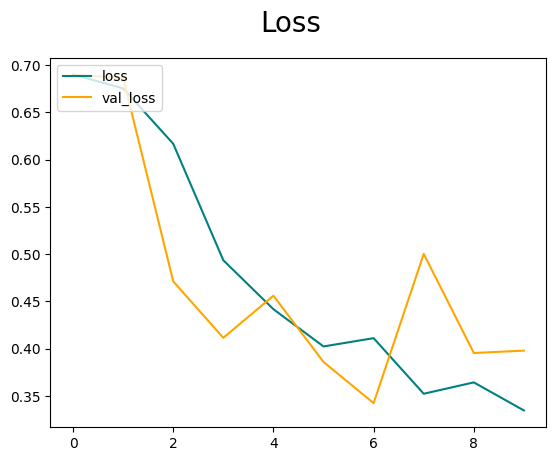

In [596]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal',label='loss')
plt.plot(hist.history['val_loss'], color='orange',label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

The val_loss from validation data showing lower than the loss of training data indicating that it is a good prediction model.

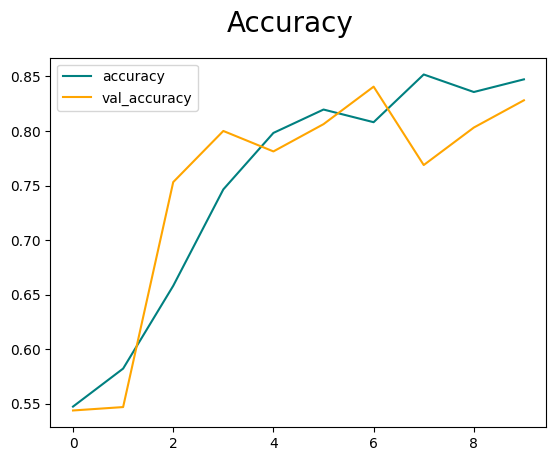

In [597]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

The val_accuracy from validation data showing higher than the accuracy of training data indicating that it is a good prediction model.

# 9. Evaluate

In [598]:
# METHOD 1
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

pre = Precision()
re = Recall()
acc = BinaryAccuracy()

for batch in test.as_numpy_iterator():
    X,y = batch
    pred = model.predict(X)
    pre.update_state(y,pred)
    re.update_state(y,pred)
    acc.update_state(y,pred)

print(pre.result(), re.result(), acc.result())

1/1 [==============================] - 0s 177ms/step
tf.Tensor(0.82222223, shape=(), dtype=float32) tf.Tensor(0.87058824, shape=(), dtype=float32) tf.Tensor(0.83125, shape=(), dtype=float32)


In [599]:
# METHOD 2
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report

y_pred = model.predict(val)
y_pred = np.where(y_pred > 0.5, 1, 0) # y_pred is probability, needs to convert to category. less than 0.5:class0 (cat), else class1 (rabbit)
y_test = tf.concat([y for x,y in val], axis=0)

10/10 [==============================] - 4s 146ms/step


In [600]:
# print Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.47      0.45      0.46       146
           1       0.56      0.58      0.57       174

    accuracy                           0.52       320
   macro avg       0.52      0.52      0.52       320
weighted avg       0.52      0.52      0.52       320



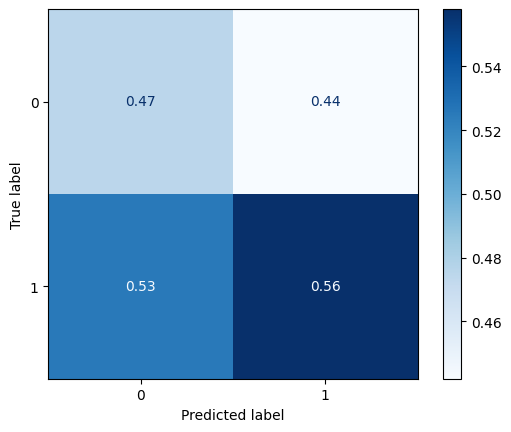

In [601]:
# METHOD 3
cm = confusion_matrix(y_test,y_pred,normalize='pred')
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot(cmap=plt.cm.Blues)
plt.show()

# 10. Test Deploy Our Model

In [602]:
import cv2

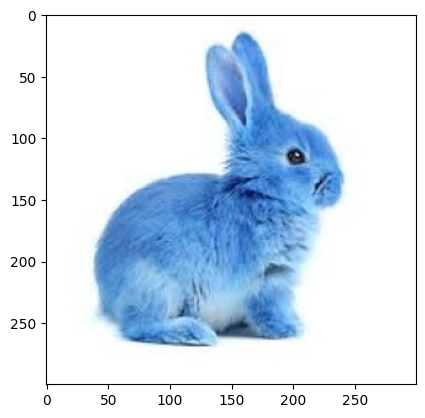

In [616]:
img = cv2.imread('rabbit.108.jpg') # place the name of the image you want to use to test deploy your model
plt.imshow(img)
plt.show()

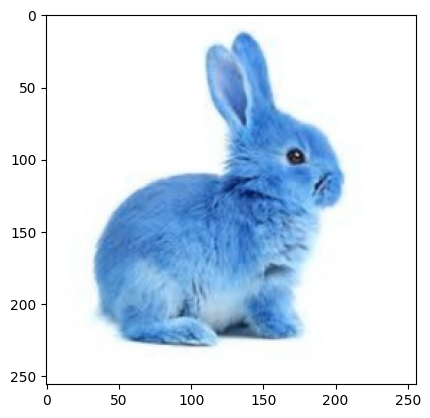

In [617]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [618]:
y_pred = model.predict(np.expand_dims(resize/255,0))
print(y_pred)

1/1 [==============================] - 0s 45ms/step
[[0.7998498]]


In [619]:
if y_pred > 0.5:
    print("Predicted class is rabbit")
else:
    print("Predicted class is cat")

Predicted class is rabbit


# 11. Save the Model

In [607]:
from tensorflow.keras.models import load_model
model.save(os.path.join('models','classify_v2.h5'))

c:\Users\ruzan\.conda\envs\AI07_CPU\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
